# Evaluate generalizability of the model across holdout plate(s)

## Import libraries

In [1]:
import pandas as pd
import pathlib
from joblib import load
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_recall_curve,
)
from typing import Tuple
import seaborn as sns
import matplotlib.pyplot as plt

## Set paths and variables

In [2]:
# Path to folder holding model and encoder files
model_dir = pathlib.Path("../1.train_models/data")

# Path to results directory
results_dir = pathlib.Path("./results")
results_dir.mkdir(exist_ok=True)

# Load in the model encoder
le = load(pathlib.Path(f"{model_dir}/trained_nf1_model_label_encoder.joblib"))

# Load in the model
model = load(pathlib.Path(f"{model_dir}/trained_nf1_model.joblib"))

# Set the random seed
rng = np.random.default_rng(0)

## Load in plate with two cell lines (Plate 6)

In [3]:
# Read in data from plate 6 with two cell lines
plate6_df = pd.read_parquet(
    pathlib.Path(
        "/media/18tbdrive/1.Github_Repositories/nf1_schwann_cell_painting_data/3.processing_features/data/single_cell_profiles/Plate_6_sc_normalized.parquet"
    )
)

# Count rows before dropping NaNs
initial_count = plate6_df.shape[0]

# Drop rows with NaNs
plate6_df = plate6_df.dropna()

# Count rows after dropping NaNs
final_count = plate6_df.shape[0]

# Print the count of dropped rows
print(f"Dropped rows: {initial_count - final_count}")

# Print shape and head of data
print(plate6_df.shape)
plate6_df.head()

Dropped rows: 173
(7210, 2323)


,Metadata_WellRow,Metadata_WellCol,Metadata_Well,Metadata_Site,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_Institution,Metadata_seed_density,Metadata_ImageNumber,...,Nuclei_Texture_Variance_DAPI_3_02_256,Nuclei_Texture_Variance_DAPI_3_03_256,Nuclei_Texture_Variance_GFP_3_00_256,Nuclei_Texture_Variance_GFP_3_01_256,Nuclei_Texture_Variance_GFP_3_02_256,Nuclei_Texture_Variance_GFP_3_03_256,Nuclei_Texture_Variance_RFP_3_00_256,Nuclei_Texture_Variance_RFP_3_01_256,Nuclei_Texture_Variance_RFP_3_02_256,Nuclei_Texture_Variance_RFP_3_03_256
0,B,2,B2,22,129,NF1,WT,iNFixion,1000,80,...,3.197480,3.229717,1.441636,1.591607,1.565428,1.485191,4.016599,4.042377,3.919185,4.108695
1,B,2,B2,2,129,NF1,WT,iNFixion,1000,88,...,-0.023660,0.028003,0.034001,0.049210,0.052432,0.052482,0.041401,0.080108,0.064120,0.052728
2,B,2,B2,31,129,NF1,WT,iNFixion,1000,90,...,0.661088,0.614862,2.670997,2.733511,2.787154,2.741750,-0.023435,-0.039533,0.029190,0.028487
4,B,2,B2,9,129,NF1,WT,iNFixion,1000,102,...,0.571602,0.592498,-0.820049,-0.814339,-0.823781,-0.817288,-0.560496,-0.564414,-0.570386,-0.562722
5,B,2,B2,12,129,NF1,WT,iNFixion,1000,69,...,-0.906564,-0.926235,-0.799855,-0.791110,-0.786187,-0.786848,-0.199224,-0.193932,-0.192297,-0.176636


## Generate a shuffled dataset from the loaded in plate

In [4]:
# Shuffle the features randomly, excluding columns that start with "Metadata_"
shuffled_plate6_df = plate6_df.apply(
    lambda x: rng.permutation(x) if not x.name.startswith("Metadata_") else x
)

# Print shape and head of data
print(shuffled_plate6_df.shape)
shuffled_plate6_df.head()

(7210, 2323)


,Metadata_WellRow,Metadata_WellCol,Metadata_Well,Metadata_Site,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_Institution,Metadata_seed_density,Metadata_ImageNumber,...,Nuclei_Texture_Variance_DAPI_3_02_256,Nuclei_Texture_Variance_DAPI_3_03_256,Nuclei_Texture_Variance_GFP_3_00_256,Nuclei_Texture_Variance_GFP_3_01_256,Nuclei_Texture_Variance_GFP_3_02_256,Nuclei_Texture_Variance_GFP_3_03_256,Nuclei_Texture_Variance_RFP_3_00_256,Nuclei_Texture_Variance_RFP_3_01_256,Nuclei_Texture_Variance_RFP_3_02_256,Nuclei_Texture_Variance_RFP_3_03_256
0,B,2,B2,22,129,NF1,WT,iNFixion,1000,80,...,-0.914083,-0.837750,-0.486154,-0.754106,-0.638854,-0.748063,0.616715,-0.597263,-0.532500,-0.508789
1,B,2,B2,2,129,NF1,WT,iNFixion,1000,88,...,0.983418,-1.542950,-0.798369,-0.722825,0.550664,-0.838767,-0.980838,-0.406171,-0.326986,-0.343760
2,B,2,B2,31,129,NF1,WT,iNFixion,1000,90,...,-0.972443,2.297846,-0.691098,-0.534768,-0.808948,-0.856380,-0.337513,-0.774479,1.268335,-0.914218
4,B,2,B2,9,129,NF1,WT,iNFixion,1000,102,...,-1.395750,-0.929642,-0.660039,-0.502659,-0.645035,-0.842308,-0.641661,-0.002633,-0.478802,-0.631239
5,B,2,B2,12,129,NF1,WT,iNFixion,1000,69,...,-1.080830,-1.114064,-0.850266,-0.725235,-0.120651,-0.646195,-0.720165,1.859794,-0.318984,-0.822497


## Apply model to final and shuffled versions of the plate data

In [5]:
# Create list of the metadata columns only
meta_cols = [col for col in plate6_df.columns if "Metadata" in col]

# Define a dictionary to handle both data types
data_dict = {"final": plate6_df, "shuffled": shuffled_plate6_df}

# Initialize a list to store processed dataframes
processed_dfs = []

# Loop through the data dictionary to create probability dataframes
for data_type, data in data_dict.items():
    # Ensure no duplicates in data and reset index
    data = data.drop_duplicates().reset_index(drop=True)

    # Predict probabilities and labels
    probabilities = model.predict_proba(data[model.feature_names_in_])[:, 1]
    predicted_genotype = model.predict(
        data[model.feature_names_in_]
    )  # outputs as binary labels

    # Make a copy of the column to avoid modifying the original dataframe
    true_genotype = data["Metadata_genotype"].copy()

    # Set HET values to 2 explicitly
    true_genotype.loc[true_genotype == "HET"] = 2

    # Use label encoder for the remaining values (excluding HET)
    mask = true_genotype != 2  # Identify rows that are not HET
    true_genotype.loc[mask] = le.transform(true_genotype.loc[mask])

    # Convert dtype to integer
    true_genotype = true_genotype.astype(int)

    # Create a dataframe with probabilities and predictions
    probability_df = pd.DataFrame(
        {
            "probability_WT": probabilities,
            "predicted_genotype": predicted_genotype,
            "true_genotype": true_genotype,
            "data_type": data_type,
        },
        index=data.index,  # Ensure alignment with original data
    )

    # Add metadata columns (reset index to align lengths)
    metadata_df = data[meta_cols].reset_index(drop=True)
    assert len(probability_df) == len(
        metadata_df
    ), "Row count mismatch between probabilities and metadata!"

    full_df = pd.concat([probability_df, metadata_df], axis=1)
    processed_dfs.append(full_df)

# Combine all dataframes
combined_df = pd.concat(processed_dfs, axis=0).reset_index(drop=True)

# Save to Parquet
combined_df.to_parquet(f"{results_dir}/plate_6_single_cell_probabilities.parquet")

# Print shape and head of data
print(combined_df.shape)
combined_df.head()

(14420, 27)


,probability_WT,predicted_genotype,true_genotype,data_type,Metadata_WellRow,Metadata_WellCol,Metadata_Well,Metadata_Site,Metadata_number_of_singlecells,Metadata_gene_name,...,Metadata_Cytoplasm_Parent_Nuclei,Metadata_Nuclei_Number_Object_Number,Metadata_Image_FileName_CY5,Metadata_Image_FileName_DAPI,Metadata_Image_FileName_GFP,Metadata_Image_FileName_RFP,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y
0,0.928438,1,1,final,B,2,B2,22,129,NF1,...,1,1,B2_01_3_22_CY5_001_illumcorrect.tiff,B2_01_1_22_DAPI_001_illumcorrect.tiff,B2_01_2_22_GFP_001_illumcorrect.tiff,B2_01_4_22_RFP_001_illumcorrect.tiff,155.999315,190.971932,157.363528,192.855185
1,0.251609,0,1,final,B,2,B2,2,129,NF1,...,1,1,B2_01_3_2_CY5_001_illumcorrect.tiff,B2_01_1_2_DAPI_001_illumcorrect.tiff,B2_01_2_2_GFP_001_illumcorrect.tiff,B2_01_4_2_RFP_001_illumcorrect.tiff,416.103047,206.097181,440.012394,201.108451
2,0.231546,0,1,final,B,2,B2,31,129,NF1,...,1,1,B2_01_3_31_CY5_001_illumcorrect.tiff,B2_01_1_31_DAPI_001_illumcorrect.tiff,B2_01_2_31_GFP_001_illumcorrect.tiff,B2_01_4_31_RFP_001_illumcorrect.tiff,728.294430,635.641497,763.729643,610.353837
3,0.000043,0,1,final,B,2,B2,9,129,NF1,...,1,1,B2_01_3_9_CY5_001_illumcorrect.tiff,B2_01_1_9_DAPI_001_illumcorrect.tiff,B2_01_2_9_GFP_001_illumcorrect.tiff,B2_01_4_9_RFP_001_illumcorrect.tiff,281.756532,106.493930,283.298039,92.492157
4,0.477985,0,1,final,B,2,B2,12,129,NF1,...,1,1,B2_01_3_12_CY5_001_illumcorrect.tiff,B2_01_1_12_DAPI_001_illumcorrect.tiff,B2_01_2_12_GFP_001_illumcorrect.tiff,B2_01_4_12_RFP_001_illumcorrect.tiff,583.934823,527.486878,629.326367,472.382260


## Split the probability data by Institution

In [6]:
# Create dictionary with the split dataframes based on Institution
institution_dfs = {
    institution: combined_df[combined_df["Metadata_Institution"] == institution].copy()
    for institution in combined_df["Metadata_Institution"].unique()
}

## Generate PR curve results (for pre-visualization)

In [7]:
precision_recall_data = []

for institution, df in institution_dfs.items():
    for data_type in ["final", "shuffled"]:  # Compute separately for both types
        # Subset for data type and remove the HET cells from evaluation
        subset_df = df[(df["data_type"] == data_type) & (df["Metadata_genotype"] != "HET")]

        # Compute precision-recall curve
        precision, recall, _ = precision_recall_curve(
            subset_df["true_genotype"], subset_df["probability_WT"]
        )
        
        institution_results = pd.DataFrame({
            "Precision": precision[:-1],  
            "Recall": recall[:-1],        
            "Metadata_Institution": institution,
            "data_type": data_type,
        })
        
        precision_recall_data.append(institution_results)

# Combine all institution-based PR data
precision_recall_df = pd.concat(precision_recall_data, ignore_index=True)

# Save PR curve data to parquet file
precision_recall_df.to_parquet(f"{results_dir}/plate6_precision_recall_final_model.parquet")

print(precision_recall_df.shape)
precision_recall_df.head()

(9129, 4)


,Precision,Recall,Metadata_Institution,data_type
0,0.665409,1.000000,iNFixion,final
1,0.665828,1.000000,iNFixion,final
2,0.666247,1.000000,iNFixion,final
3,0.666037,0.999055,iNFixion,final
4,0.665826,0.998110,iNFixion,final


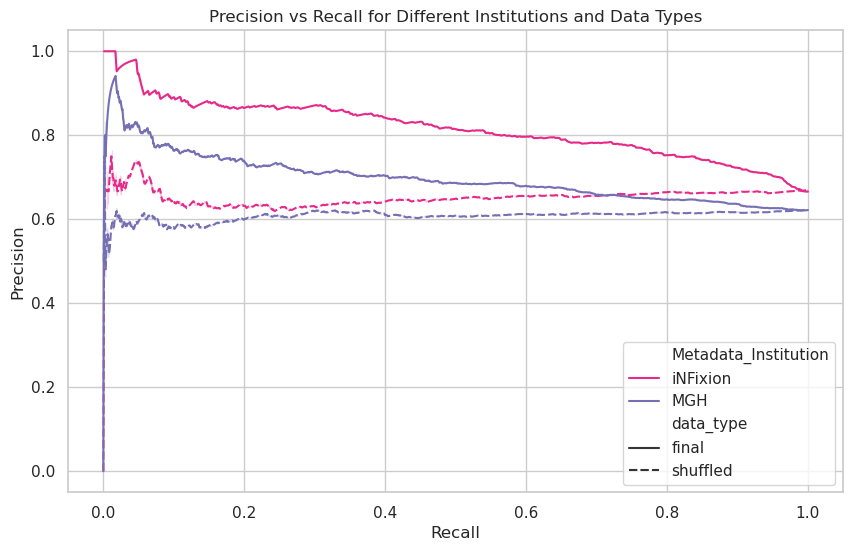

In [8]:
# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define a color palette based on Set2 (you can adjust n_colors to match your needs)
institution_palette = sns.color_palette("Dark2", n_colors=8)

# Create a mapping dictionary of institutions to specific colors from Set2
institution_color_map = {
    "MGH": institution_palette[2],
    "iNFixion": institution_palette[3],
}

# Plot the data
sns.lineplot(
    data=precision_recall_df,
    x="Recall",
    y="Precision",
    hue="Metadata_Institution",
    style="data_type",
    palette=institution_color_map,
    dashes=True,
)

# Add labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall for Different Institutions and Data Types")
plt.legend()
plt.show()

## Generate accuracy scores per institution and data type (final or shuffled)

In [9]:
# Calculate accuracy per institution and data type (final or shuffled) without the HET cells
accuracy_per_group = combined_df[combined_df["Metadata_genotype"] != "HET"].groupby(
    ["Metadata_Institution", "data_type"]
).apply(lambda x: accuracy_score(x["true_genotype"], x["predicted_genotype"])).reset_index(name="accuracy")

# Save accuracy data to parquet file
accuracy_per_group.to_parquet(f"{results_dir}/plate6_accuracy_final_model.parquet")

accuracy_per_group

,Metadata_Institution,data_type,accuracy
0,MGH,final,0.587563
1,MGH,shuffled,0.493782
2,iNFixion,final,0.618868
3,iNFixion,shuffled,0.489937


## Generate bar plot (for pre-visualization)

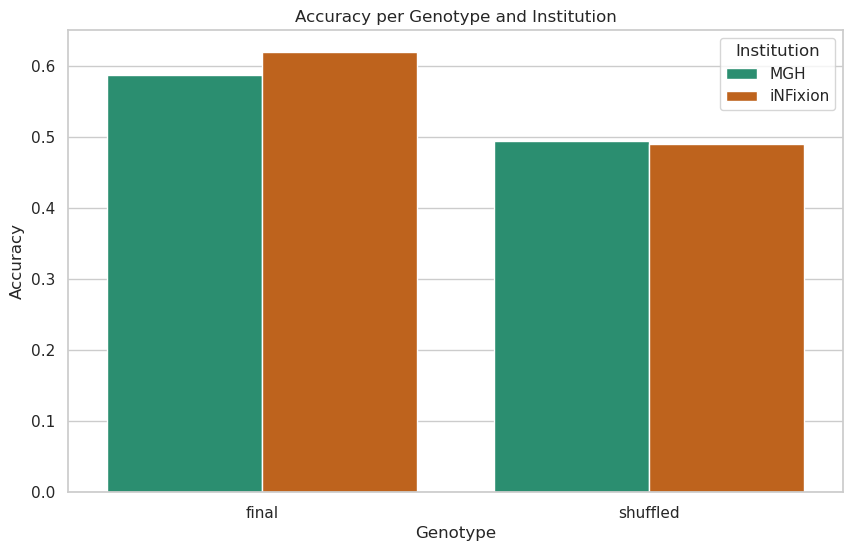

In [10]:
# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(
    data=accuracy_per_group,
    x="data_type",
    y="accuracy",
    hue="Metadata_Institution",
    palette="Dark2"
)

# Add labels and title
plt.xlabel("Genotype")
plt.ylabel("Accuracy")
plt.title("Accuracy per Genotype and Institution")
plt.legend(title="Institution")
plt.show()

## Look at how the accuracies break down per genotype

In [11]:
# Calculate accuracy per genotype, institution and data type (final or shuffled)
accuracy_per_group = combined_df[combined_df["Metadata_genotype"] != "HET"].groupby(
    ["Metadata_genotype","Metadata_Institution", "data_type"]
).apply(lambda x: accuracy_score(x["true_genotype"], x["predicted_genotype"])).reset_index(name="accuracy")

accuracy_per_group

,Metadata_genotype,Metadata_Institution,data_type,accuracy
0,Null,MGH,final,0.405333
1,Null,MGH,shuffled,0.440000
2,Null,iNFixion,final,0.712406
3,Null,iNFixion,shuffled,0.454887
4,WT,MGH,final,0.698378
5,WT,MGH,shuffled,0.526486
6,WT,iNFixion,final,0.571834
7,WT,iNFixion,shuffled,0.507561
